- **NOME:** Pedro Luís Azevedo Costa
- **RA:** 175857

# Exercício 2:
- Reproduzir todos os exemplos do capítulo 7 (*Exploratory Data Analysis*) conforme livro localizado [neste link](https://byuidatascience.github.io/python4ds/exploratory-data-analysis.html)

## 7.1.1 - Prerequisites

In [68]:
import pandas as pd
import altair as alt
import numpy as np
from scipy import stats
from plotnine import *

alt.data_transformers.enable('json')

import warnings

warnings.filterwarnings("ignore")

#> DataTransformerRegistry.enable('json')


In [4]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/diamonds/diamonds.csv"
diamonds = pd.read_csv(url)

diamonds['cut'] = pd.Categorical(diamonds.cut, 
  ordered = True, 
  categories =  ["Fair", "Good", "Very Good", "Premium", "Ideal" ])

diamonds['color'] = pd.Categorical(diamonds.color, 
  ordered = True, 
  categories =  ["D", "E", "F", "G", "H", "I", "J"])


diamonds['clarity'] = pd.Categorical(diamonds.clarity, 
  ordered = True, 
  categories =  ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])


In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 7.3.1 Visualising distributions

In [15]:
chart_dat = (diamonds
              .groupby('cut')
              .agg(count = ('carat', 'size'))
              .reset_index())

# Ordenando o eixo x alfabeticamente
chart_dat['cut'] = pd.Categorical(chart_dat['cut'], 
                                  categories=sorted(chart_dat['cut'].unique()), 
                                  ordered=True)



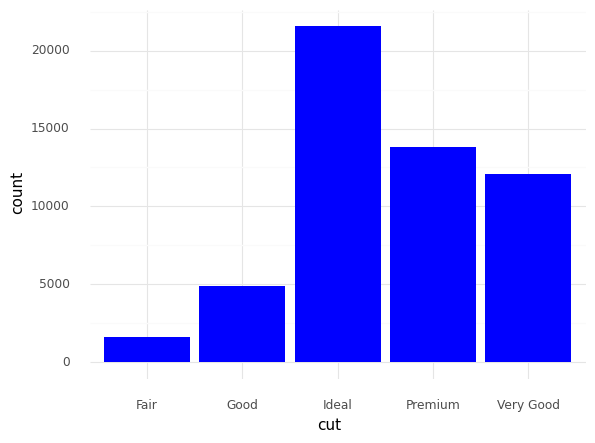

<ggplot: (812317356)>

In [21]:
chart = (
    ggplot(chart_dat, aes(x="cut", y="count"))
    + geom_bar(stat="identity", fill="blue")
    + scale_x_discrete(limits=sorted(chart_dat["cut"].unique()))
    + theme_minimal()
)
chart

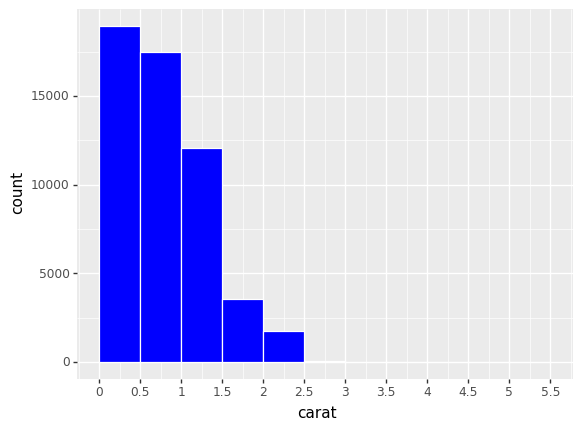

<ggplot: (811302919)>

In [37]:
plot = (
    ggplot(diamonds, aes(x="carat"))
    + geom_histogram(binwidth=0.5, fill="blue", color='white', boundary=0)
    + scale_x_continuous(limits=(0, 5.5), breaks=[x * 0.5 for x in range(12)]) 
)
plot

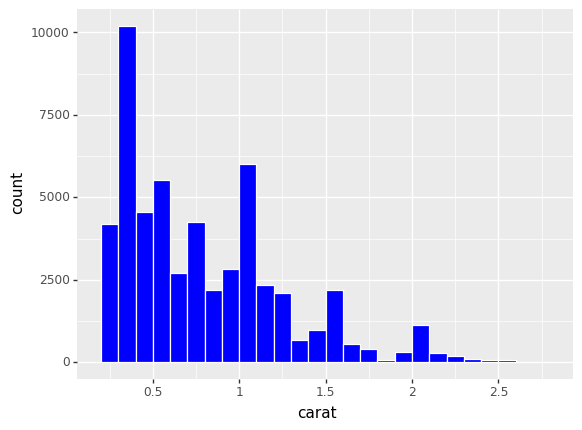

<ggplot: (811567990)>

In [71]:
smaller = diamonds.query('carat < 3')

plot = (
    ggplot(diamonds, aes(x="carat"))
    + geom_histogram(binwidth=0.1, fill="blue", color='white', boundary=0.2)
    + scale_x_continuous(limits=(0.19, 2.8), breaks=[x * 0.5 for x in range(12)]) 
)

plot

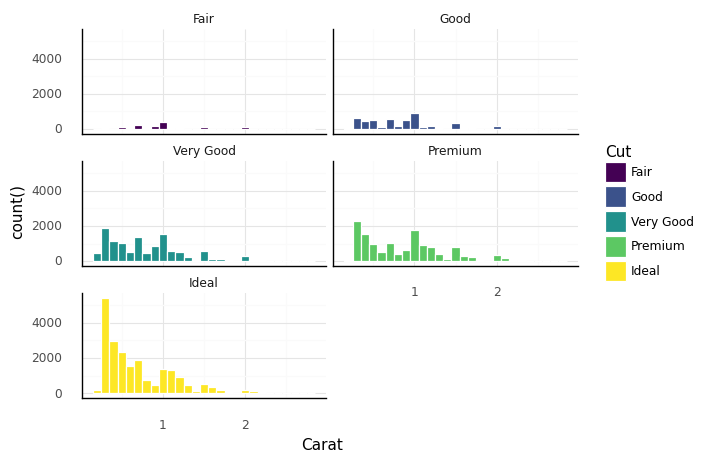

In [87]:
plot = (
    ggplot(smaller) +
    aes(x='carat', fill='cut') +
    geom_bar(stat='bin', binwidth=0.1, color='white') +
    facet_wrap('~cut', ncol=2) +
    labs(y='count()', fill='Cut', x='Carat') +
    theme_minimal() +  
    theme(
        axis_line=element_line(color='black')  
    )
)

print(plot)

## 7.3.2 Typical values

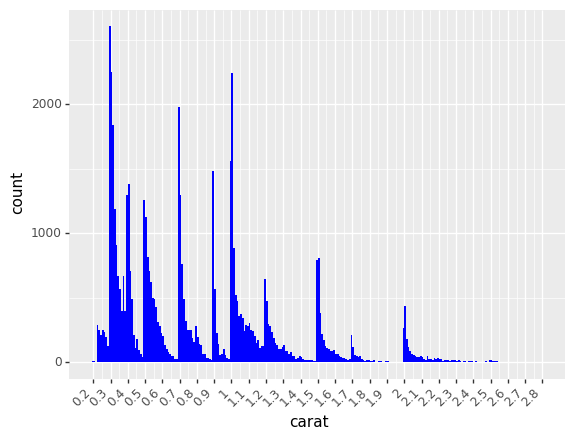

<ggplot: (813507958)>

In [102]:
smaller = diamonds.query('carat < 3')

plot = (
    ggplot(diamonds, aes(x="carat"))
    + geom_histogram(binwidth=0.01, fill="blue", boundary=0.2)
    + scale_x_continuous(limits=(0.19, 2.8), breaks=[round(x * 0.1, 2) for x in range(2, 29)]) 
    + theme(
        axis_text_x=element_text(angle=45, hjust=1) 
    )

)

plot

In [104]:
# Lê o dataset faithful
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/faithful/faithful.csv"
faithful = pd.read_csv(url)
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


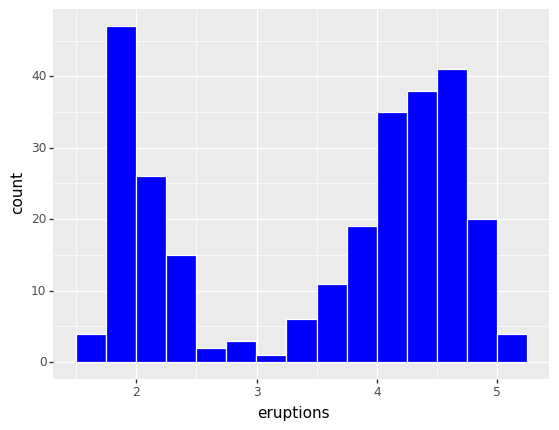

In [114]:
plot = (
    ggplot(faithful, aes(x="eruptions"))
    + geom_histogram(binwidth=0.25, fill="blue", color='white', boundary=1.499)
)

print(plot)



## 7.3.3 Unusual values

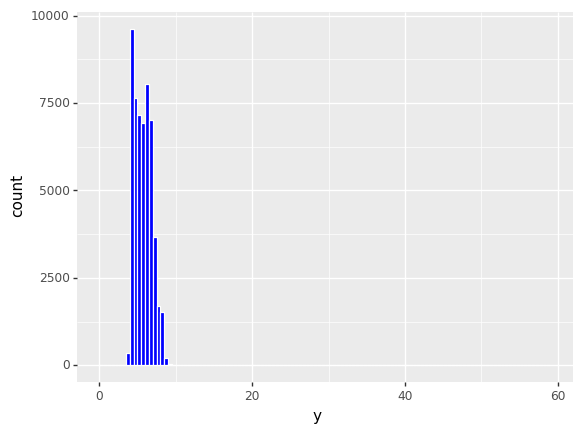

In [131]:
plot = (
    ggplot(diamonds, aes(x="y"))
    + geom_histogram(binwidth=0.5, fill="blue", color='white', boundary=0.0)

)

print(plot)



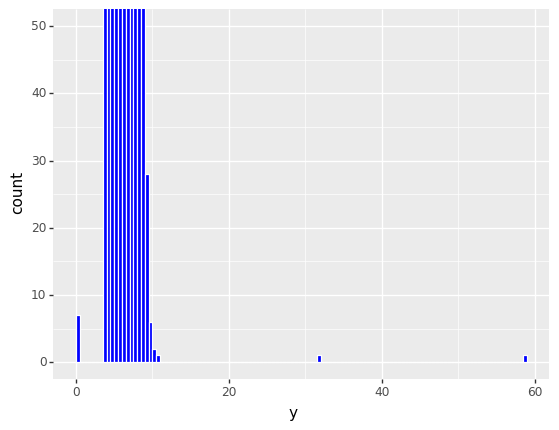

In [132]:
plot = (
    ggplot(diamonds, aes(x="y"))
    + geom_histogram(binwidth=0.5, fill="blue", color='white', boundary=0.0)
    + coord_cartesian(ylim=(0, 50))  # Limita o eixo y até 50

)

print(plot)



In [133]:
unusual = (diamonds
            .query('y < 3 | y > 20')
            .filter(['price', 'x', 'y', 'z'])
            .sort_values('y'))

unusual.head()

,price,x,y,z
11963,5139,0.0,0.0,0.0
15951,6381,0.0,0.0,0.0
24520,12800,0.0,0.0,0.0
26243,15686,0.0,0.0,0.0
27429,18034,0.0,0.0,0.0


## 7.4 Missing values


In [134]:
diamonds2 = diamonds.query('3 <= y <= 20')
diamonds2 = diamonds.assign(
        y = lambda x: np.where((x.y < 3) | (x.y > 20), np.nan, x.y)
        )
diamonds2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


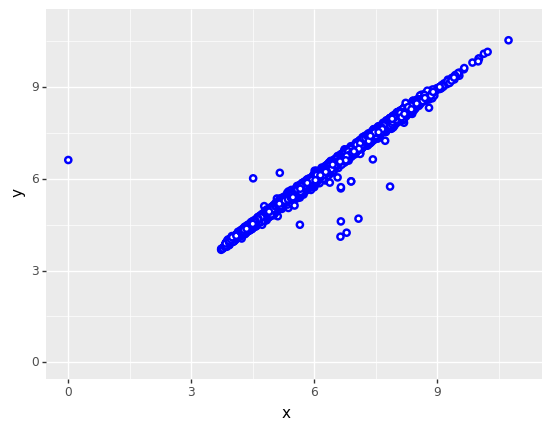

In [145]:
# Faz um scatter em que cada ponto é um circulo 

plot = (
    ggplot(diamonds2, aes(x="x", y="y"))
    + geom_point(shape="o", fill='white', color="blue", stroke=1)
    + coord_cartesian(xlim=(0, 11), ylim=(0, 11))
)

print(plot)

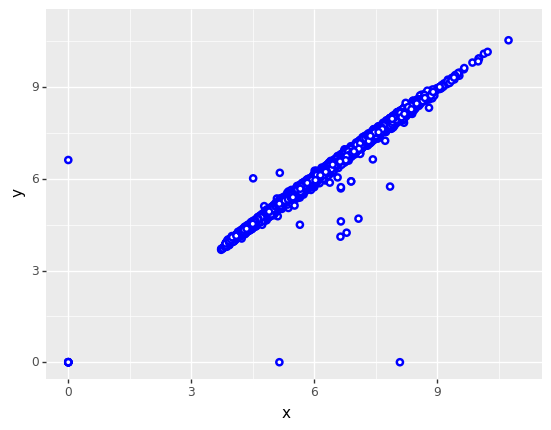

In [149]:
# Substitu os valores NaN ou None por 0
diamonds2_aux = diamonds2[['x', 'y']].fillna(0)

plot = (
    ggplot(diamonds2_aux, aes(x="x", y="y"))
    + geom_point(shape="o", fill='white', color="blue", stroke=1)
    + coord_cartesian(xlim=(0, 11), ylim=(0, 11))
)

print(plot)

In [150]:
flights_url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/flights/flights.csv"

flights = pd.read_csv(flights_url)
flights['time_hour'] = pd.to_datetime(flights.time_hour, format = "%Y-%m-%d %H:%M:%S")

pdat = flights.assign(
  cancelled = lambda x: pd.isna(x.dep_time),
  sched_hour = lambda x: x.sched_dep_time // 100,
  sched_minute = lambda x: x.sched_dep_time % 100,
  sched_dep_time = lambda x: x.sched_hour + x.sched_minute / 60  
  )

pdat.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,cancelled,sched_hour,sched_minute
0,2013,1,1,517.0,5.250000,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00,False,5,15
1,2013,1,1,533.0,5.483333,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00,False,5,29
2,2013,1,1,542.0,5.666667,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00,False,5,40
3,2013,1,1,544.0,5.750000,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00,False,5,45
4,2013,1,1,554.0,6.000000,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00,False,6,0


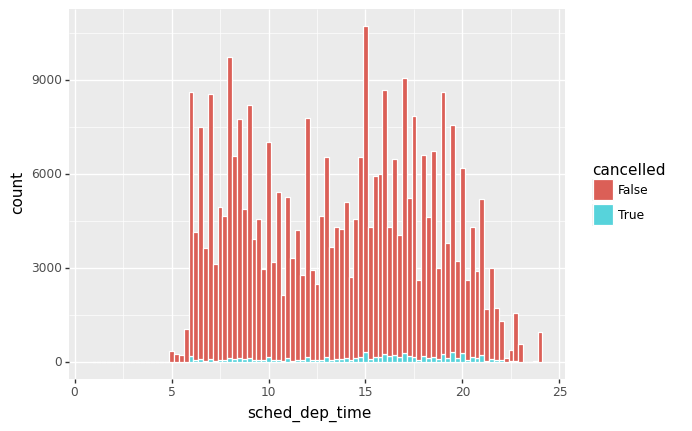

In [154]:
plot = (
    ggplot(pdat, aes(x='sched_dep_time', fill='cancelled'))
    + geom_bar(stat='bin', binwidth=0.25, color='white') 
)

print(plot)

## 7.5.1 A categorical and continuous variable

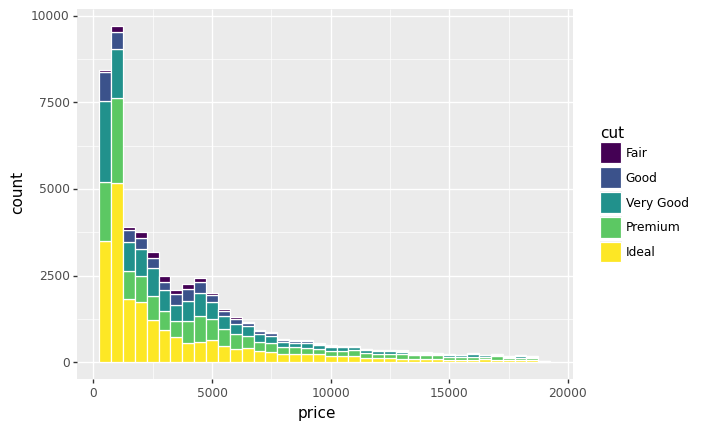

In [159]:
plot = (
    ggplot(diamonds, aes(x='price', fill='cut'))
    + geom_bar(stat='bin', binwidth=500, color='white')  
)

print(plot)

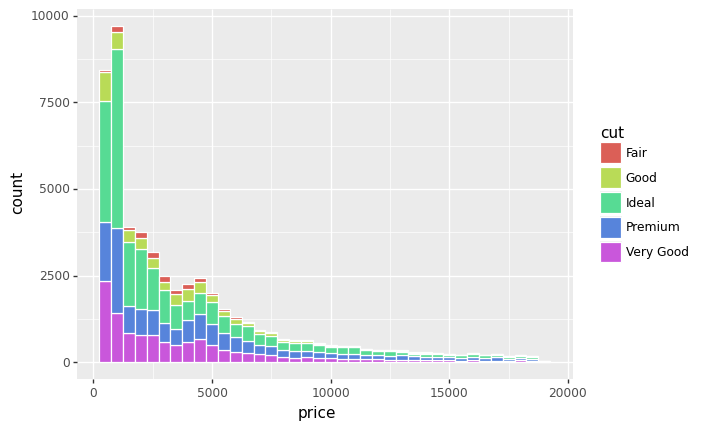

In [160]:
diamonds_aux = diamonds.copy(deep=True)
diamonds_aux['cut'] = pd.Categorical(diamonds_aux['cut'], categories=sorted(diamonds_aux['cut'].unique()), ordered=True)

plot = (
    ggplot(diamonds_aux, aes(x='price', fill='cut'))
    + geom_bar(stat='bin', binwidth=500, color='white')
    + scale_fill_discrete(limits=sorted(diamonds_aux['cut'].unique()))
)

print(plot)

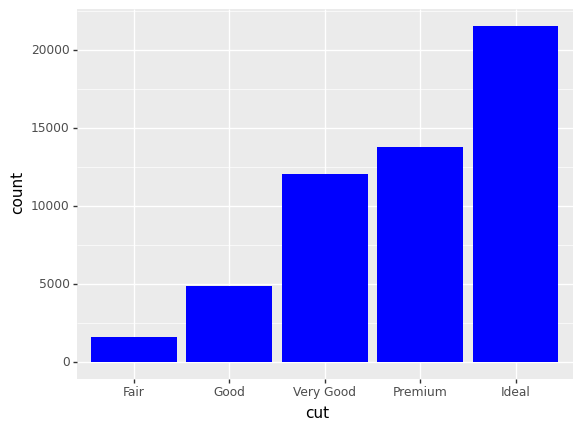

In [167]:
plot = (
    ggplot(diamonds, aes(x='cut'))
    + geom_bar(aes(y='..count..'), fill='blue')  
    + scale_x_discrete(limits=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
)

print(plot)

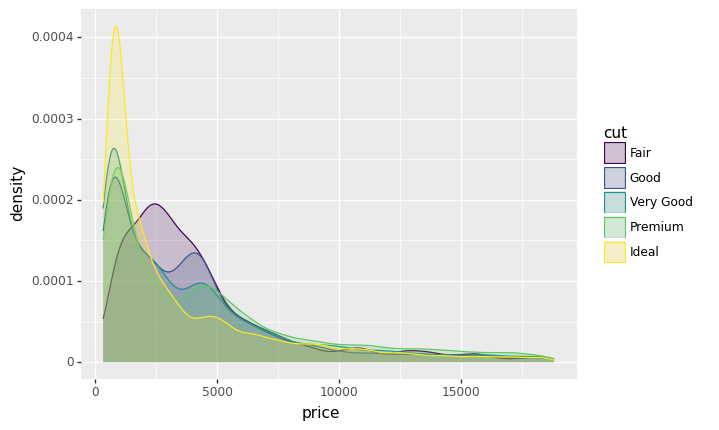

In [170]:
plot = (
    ggplot(diamonds, aes(x='price', fill='cut', color='cut'))
    + geom_density(alpha=0.2)
    )

print(plot)

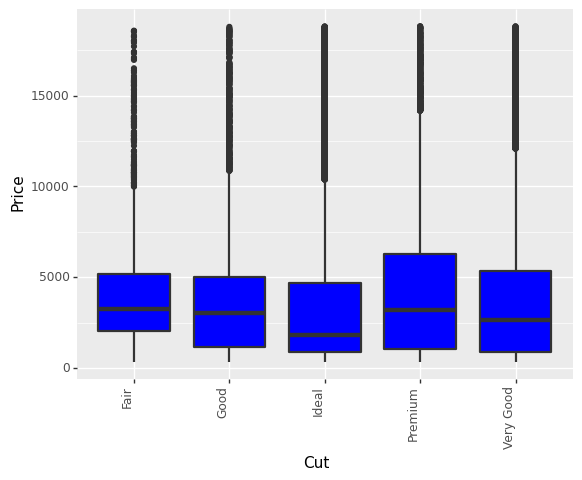

In [185]:
diamonds_aux = diamonds.copy(deep=True)
diamonds_aux['cut'] = pd.Categorical(diamonds_aux['cut'], categories=sorted(diamonds_aux['cut'].unique()), ordered=True)


plot = (ggplot(diamonds_aux, aes(x='cut', y='price'))
         + geom_boxplot(fill='blue', size=0.9)  # Cor das caixas e bordas
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  # Para rotacionar os rótulos do eixo x
         + labs(x='Cut', y='Price')  # Rótulos dos eixos
         + scale_fill_discrete(limits=sorted(diamonds_aux['cut'].unique()))
)

print(plot)

In [186]:
url = "https://github.com/byuidatascience/data4python4ds/raw/master/data-raw/mpg/mpg.csv"
mpg = pd.read_csv(url)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


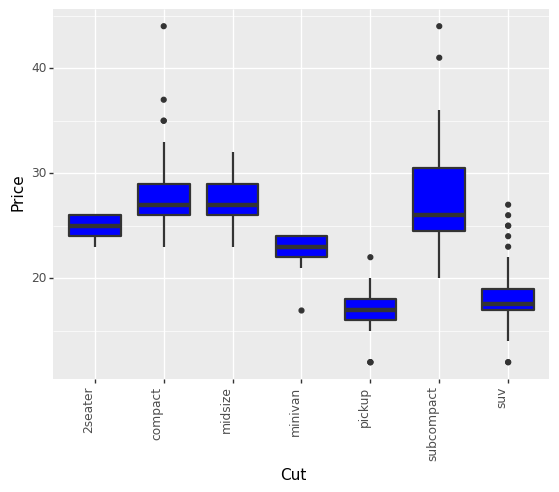

In [187]:
plot = (ggplot(mpg, aes(x='class', y='hwy'))
         + geom_boxplot(fill='blue', size=0.9)  # Cor das caixas e bordas
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  # Para rotacionar os rótulos do eixo x
         + labs(x='Cut', y='Price')  # Rótulos dos eixos
)

print(plot)

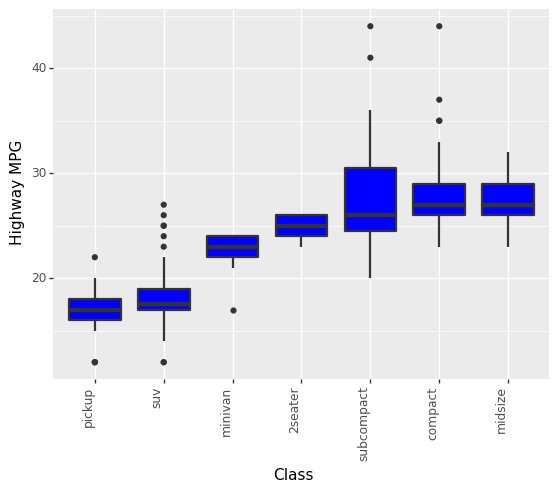

In [189]:
# Reordenar 'class' com base na mediana de 'hwy'
mpg['class'] = pd.Categorical(mpg['class'], 
                              categories=mpg.groupby('class')['hwy'].median().sort_values().index, 
                              ordered=True)

# Criar o plot
plot = (ggplot(mpg, aes(x='class', y='hwy'))
         + geom_boxplot(fill='blue', size=0.9)  
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  
         + labs(x='Class', y='Highway MPG')  
)

print(plot)

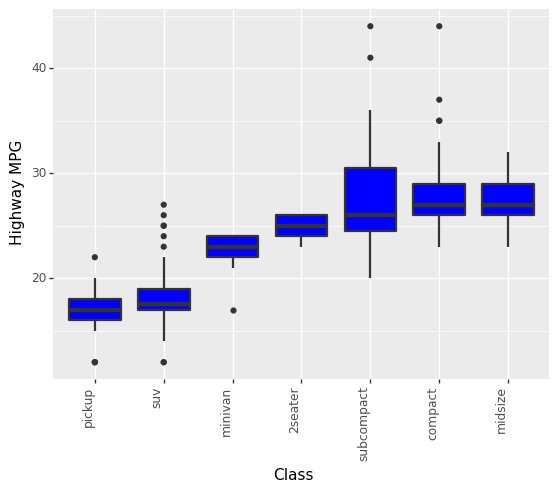

In [191]:
# Reordenar 'class' com base na mediana de 'hwy'
mpg['class'] = pd.Categorical(mpg['class'], 
                              categories=mpg.groupby('class')['hwy'].median().sort_values().index, 
                              ordered=True)

# Criar o plot
plot = (ggplot(mpg, aes(x='class', y='hwy'))
         + geom_boxplot(fill='blue', size=0.9)  
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  
         + labs(x='Class', y='Highway MPG')  
         
)

print(plot)

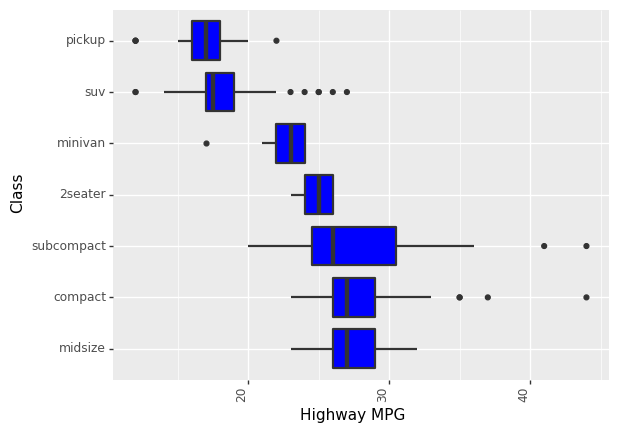

In [208]:
# Reordenar 'class' com base na mediana de 'hwy'
mpg['class'] = pd.Categorical(mpg['class'], 
                              categories=mpg.groupby('class')['hwy'].median().sort_values(ascending=False).index, 
                              ordered=True)

# Criar o plot
plot = (ggplot(mpg, aes(x='class', y='hwy'))
         + geom_boxplot(fill='blue', size=0.9)  
         + theme(axis_text_x=element_text(rotation=90, hjust=1))  
         + labs(x='Class', y='Highway MPG')  
         + coord_flip()
         + scale_x_discrete(limits=mpg['class'].cat.categories[::-1])  # Inverter a ordem


)

print(plot)

## 7.5.3 Two continuous variables


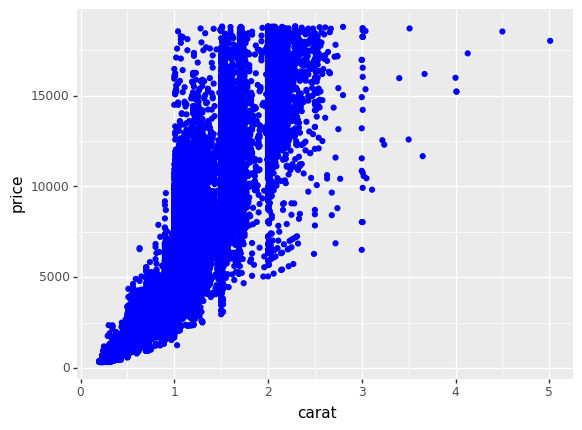

In [210]:
plot = ggplot(diamonds, aes(x="carat", y="price")) + geom_point(color="blue")

print(plot)

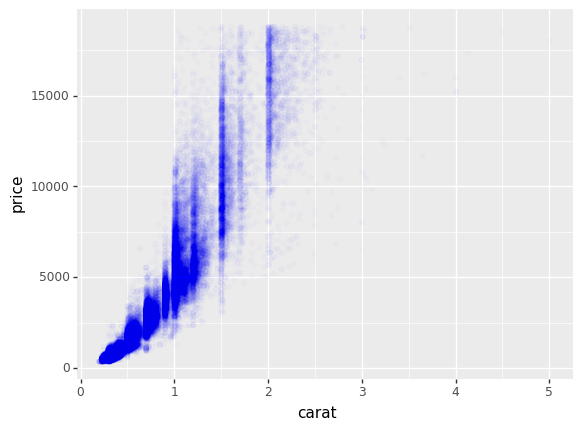

In [212]:
plot = ggplot(diamonds, aes(x="carat", y="price")) + geom_point(color="blue", alpha=0.01)

print(plot)

In [213]:
chart_dat = (smaller
    .assign(
      price_cut = lambda x: pd.cut(x.price, 
                        bins = np.arange(0, 20000, step = 1000), 
                        labels = np.arange(0, 19000, step = 1000)), 
      carat_cut = lambda x: pd.cut(x.carat, 
                        bins = np.arange(0, 5.4, step = .2), 
                        labels = np.arange(0, 5.2, step = .2))
      ))
      
chart_dat.head()      


,carat,cut,color,clarity,depth,table,price,x,y,z,price_cut,carat_cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0.2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0.2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0.2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0.2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0.2


In [214]:
chart_dat_binned = (chart_dat
    .groupby(['carat_cut', 'price_cut'])
    .size()
    .reset_index(name = 'n'))

chart_dat_binned['n'].replace(to_replace = 0, value = np.nan, inplace = True)

chart_dat_binned.head()    


,carat_cut,price_cut,n
0,0.0,0,12.0
1,0.0,1000,NaN
2,0.0,2000,NaN
3,0.0,3000,NaN
4,0.0,4000,NaN


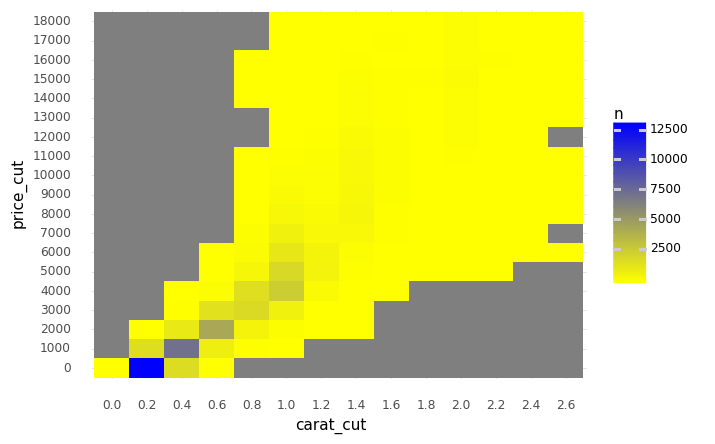

In [231]:
chart_dat_binned_filtered = chart_dat_binned[
    chart_dat_binned["carat_cut"].astype(float) <= 2.8
]


plot = (
    ggplot(chart_dat_binned_filtered, aes(x="carat_cut", y="price_cut", fill="n"))
    + geom_tile()
    + scale_fill_gradient(low="yellow", high="blue")
    + theme(axis_text_x=element_text(angle=45, hjust=1))
    + scale_x_discrete(labels=lambda l: [f"{float(x):.1f}" for x in l])
    + theme_minimal()
)

print(plot)

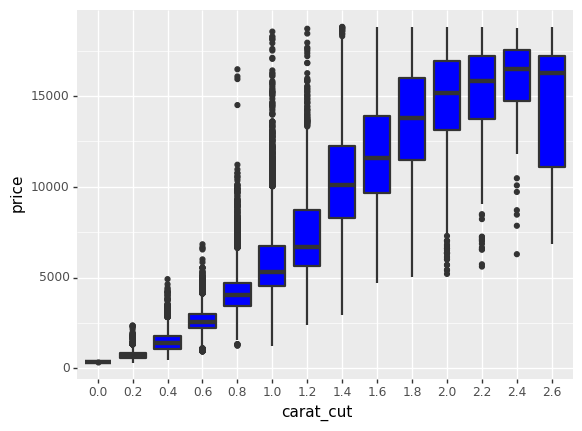

In [233]:
# Criar o plot
plot = (ggplot(chart_dat, aes(x='carat_cut', y='price'))
         + geom_boxplot(fill='blue', size=0.9)  
         + scale_x_discrete(labels=lambda l: [f"{float(x):.1f}" for x in l])

)

print(plot)

In [234]:
chart_dat = smaller.assign(carat_cut = lambda x: pd.qcut(x.carat,10, labels = False))


,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,5


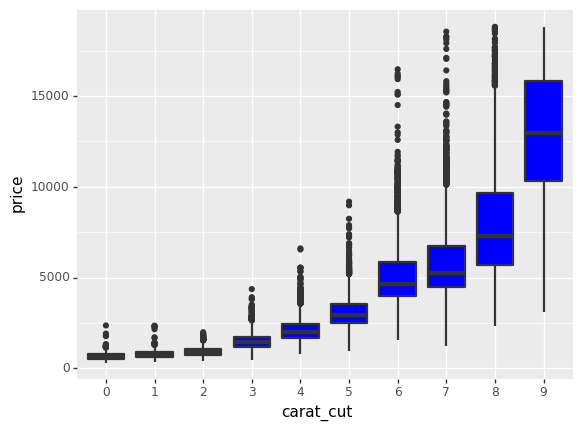

In [238]:
# Converte o carat_cut em um dado categorico
chart_dat['carat_cut'] = pd.Categorical(chart_dat['carat_cut'], 
                                        categories=sorted(chart_dat['carat_cut'].unique()), 
                                        ordered=True)

# Criar o plot
plot = (ggplot(chart_dat, aes(x='carat_cut', y='price'))
         + geom_boxplot(fill='blue', size=0.9)  
)

print(plot)

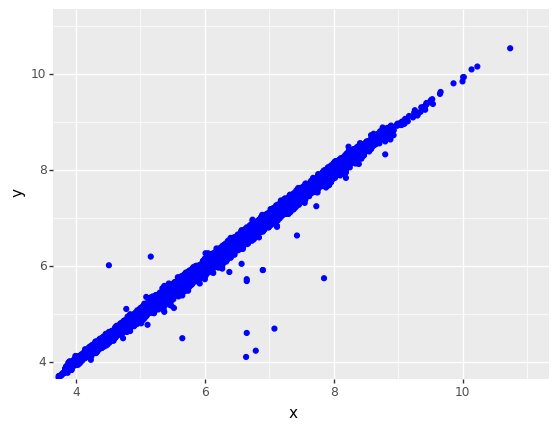

In [241]:
# Substitu os valores NaN ou None por 0

plot = (
    ggplot(diamonds, aes(x="x", y="y"))
    + geom_point(color="blue")
    + coord_cartesian(xlim=(4, 11), ylim=(4, 11))
)

print(plot)

## 7.6 Patterns and models

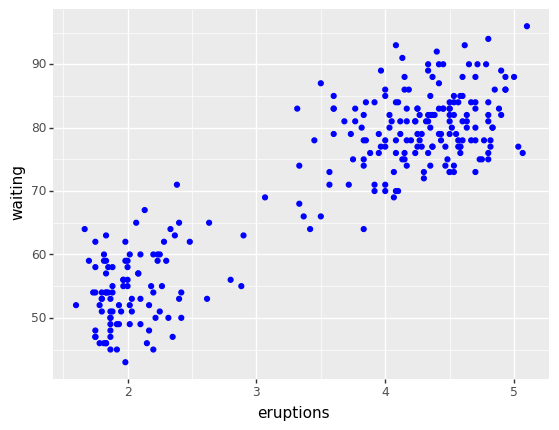

In [243]:
plot = (
    ggplot(faithful, aes(x="eruptions", y="waiting"))
    + geom_point(color="blue")
)

print(plot)

In [244]:
import statsmodels.formula.api as smf

mod = smf.ols('np.log(price) ~ np.log(carat)', data = diamonds).fit()

diamonds2 = diamonds.assign(resid = np.exp(mod.resid))

diamonds2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,resid
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.819668
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.954656
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.822182
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.569459
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.510767


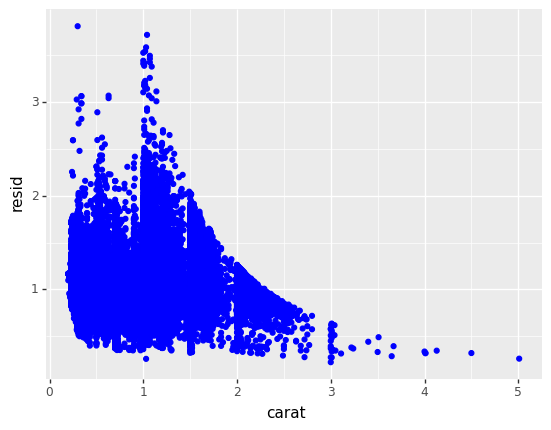

In [245]:
plot = (
    ggplot(diamonds2, aes(x="carat", y="resid"))
    + geom_point(color="blue")
)

print(plot)

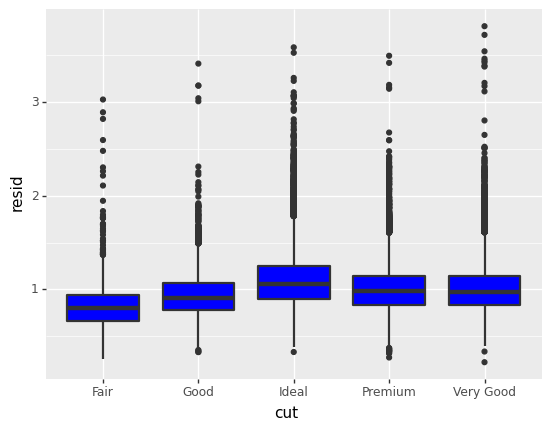

In [247]:
plot = (ggplot(diamonds2, aes(x='cut', y='resid'))
         + geom_boxplot(fill='blue', size=0.9)  
         + scale_x_discrete(limits=sorted(diamonds2["cut"].unique()))
)

print(plot)